# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from google.colab import drive
pd.options.display.max_columns = 30

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
#Model 3

drive.mount('/content/drive/')
folder_location = '/content/drive/My Drive/Springboard - Data Science Career Track/Guided Capstone - Step Three'
df = pd.read_csv(folder_location + '/data/step3_output.csv')

from sklearn import preprocessing
df_ = df.drop(['summit_elev'], axis=1)
#df = df.drop(['base_elev'], axis=1)
df_.index = df_.Name
df_ = df_.dropna(axis=0)
dfo = df_.select_dtypes(include=['object'])
df_num = df_.drop(dfo,axis=1)
df_num.drop([df_num.columns[0]], axis=1, inplace=True)

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df_num.drop(['AdultWeekend'], axis=1)
print(X.head(10))
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_num.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)

# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("y_pred: ")
print(y_pred)


from sklearn.metrics import explained_variance_score, mean_absolute_error
evaluation_var_score = explained_variance_score(y_test, y_pred)
evaluation_absoluate_error = mean_absolute_error(y_test, y_pred)
print(evaluation_var_score)
print(evaluation_absoluate_error)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
                               vertical_drop  trams  fastEight  fastSixes  \
Name                                                                        
Hilltop Ski Area                         294      0        0.0          0   
Sunrise Park Resort                     1800      0        0.0          0   
Yosemite Ski & Snowboard Area            600      0        0.0          0   
Boreal Mountain Resort                   500      0        0.0          0   
Dodge Ridge                             1600      0        0.0          0   
Donner Ski Ranch                         750      0        0.0          0   
June Mountain                           2590      0        0.0          0   
Mt. Shasta Ski Park                     1435      0        0.0          0   
Mountain High                           1600      0        0.0          0   
Ski China Peak        

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [3]:

folder_location = '/content/drive/My Drive/Springboard - Data Science Career Track/Guided Capstone - Step Two'
file_name = '/updated_ski_data.csv'
csv_url = folder_location + file_name
uncleaned_df = pd.read_csv(csv_url)
# print(uncleaned_df.head(5))
print(uncleaned_df[uncleaned_df.Name.str.contains('Big Mountain')])


Empty DataFrame
Columns: [Name, Region, state, summit_elev, vertical_drop, base_elev, trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, total_chairs, Runs, TerrainParks, LongestRun_mi, SkiableTerrain_ac, Snow Making_ac, daysOpenLastYear, yearsOpen, averageSnowfall, AdultWeekday, AdultWeekend, projectedDaysOpen, NightSkiing_ac]
Index: []


In [4]:
df_bm = uncleaned_df[uncleaned_df.Name.str.contains('Big')]
print(df_bm)

                                      Name        Region         state  \
74           Big Squaw Mountain Ski Resort         Maine         Maine   
97                 Big Powderhorn Mountain      Michigan      Michigan   
99             Big Snow Resort - Blackjack      Michigan      Michigan   
105  Big Snow Resort - Indianhead Mountain      Michigan      Michigan   
140                         Big Sky Resort       Montana       Montana   
238                           Ski Big Bear  Pennsylvania  Pennsylvania   
239                            Big Boulder  Pennsylvania  Pennsylvania   

     summit_elev  vertical_drop  base_elev  trams  fastEight  fastSixes  \
74          3200            660       1750      0        NaN          0   
97          1800            600       1200      0        0.0          0   
99           850            465        385      0        0.0          0   
105         1935            638       1297      0        NaN          0   
140        11166           4350 

In [5]:
print(df_bm[0:2])

                             Name    Region     state  summit_elev  \
74  Big Squaw Mountain Ski Resort     Maine     Maine         3200   
97        Big Powderhorn Mountain  Michigan  Michigan         1800   

    vertical_drop  base_elev  trams  fastEight  fastSixes  fastQuads  quad  \
74            660       1750      0        NaN          0          0     0   
97            600       1200      0        0.0          0          0     0   

    triple  double  surface  total_chairs  Runs  TerrainParks  LongestRun_mi  \
74       1       0        0             1  29.0           NaN            0.8   
97       0       9        1            10  45.0           2.0            1.0   

    SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
74                NaN             NaN              67.0        6.0   
97              253.0           228.0             100.0       55.0   

    averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
74              NaN          30.

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [6]:
BigSquawMountain = df_bm.iloc[0]
print(BigSquawMountain)
BigPowderhornMountain = df_bm.iloc[1]
print(BigPowderhornMountain)

Name                 Big Squaw Mountain Ski Resort
Region                                       Maine
state                                        Maine
summit_elev                                   3200
vertical_drop                                  660
base_elev                                     1750
trams                                            0
fastEight                                      NaN
fastSixes                                        0
fastQuads                                        0
quad                                             0
triple                                           1
double                                           0
surface                                          0
total_chairs                                     1
Runs                                            29
TerrainParks                                   NaN
LongestRun_mi                                  0.8
SkiableTerrain_ac                              NaN
Snow Making_ac                 

In [7]:

def prepare_variable(df):
  dfo = df.select_dtypes(include=['object'])
  df.drop(dfo,axis=1, inplace=True)
  df.drop(['AdultWeekend'], axis=1, inplace=True)
  df.drop(['summit_elev'], axis=1, inplace=True)
  #base_elev
  df.drop(['base_elev'], axis=1, inplace=True)
  df.replace(np.NaN, 0, inplace=True)
df_bm = df_bm[0:2]
prepare_variable(df_bm)
print(df_bm)
BigSquawMountain_Predict = model.predict(df_bm)

    vertical_drop  trams  fastEight  fastSixes  fastQuads  quad  triple  \
74            660      0        0.0          0          0     0       1   
97            600      0        0.0          0          0     0       0   

    double  surface  total_chairs  Runs  TerrainParks  LongestRun_mi  \
74       0        0             1  29.0           0.0            0.8   
97       9        1            10  45.0           2.0            1.0   

    SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
74                0.0             0.0              67.0        6.0   
97              253.0           228.0             100.0       55.0   

    averageSnowfall  AdultWeekday  projectedDaysOpen  NightSkiing_ac  
74              0.0          30.0               58.0             0.0  
97            214.0          69.0              108.0             0.0  


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [8]:
print(BigSquawMountain_Predict)

[2160.28654816 1342.91370882]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [9]:
print(BigSquawMountain['AdultWeekend'])
print(BigPowderhornMountain['AdultWeekend'])

30.0
69.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [10]:
print(df.shape)
df_nona= df.dropna(axis=0)

(176, 26)


(175, 21)


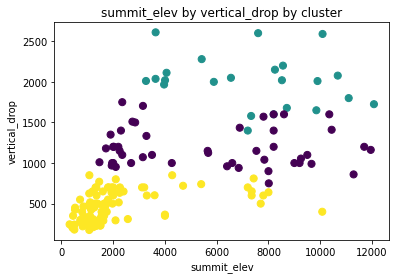

In [11]:
print(X.shape)
X_=X
y_pred = model.predict(X)
#X_['clusters'] = y_pred

from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X)
# plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')
X_['clusters'] = y_kmeans3

plt.scatter(df_nona['summit_elev'], df_nona['vertical_drop'], c=X_['clusters'], s=50, cmap='viridis', label ='clusters')
# plt.scatter(df_nona['summit_elev'], df_nona['vertical_drop'], c='black', s=100)
ac = kmeans3.cluster_centers_
# plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
folder_location = '/content/drive/My Drive/Springboard - Data Science Career Track/Guided Capstone - Step Six'
plt.savefig(folder_location + '/figures/fig1.png',bbox_inches='tight')

['Hilltop Ski Area', 'Sunrise Park Resort', 'Yosemite Ski & Snowboard Area', 'Boreal Mountain Resort', 'Dodge Ridge', 'Donner Ski Ranch', 'June Mountain', 'Mt. Shasta Ski Park', 'Mountain High', 'Ski China Peak', 'Snow Summit', 'Snow Valley', 'Soda Springs', 'Tahoe Donner', 'Monarch Mountain', 'Powderhorn', 'Cooper', 'Ski Granby Ranch', 'Sunlight Mountain Resort', 'Mohawk Mountain', 'Mount Southington Ski Area', 'Powder Ridge Park', 'Ski Sundown', 'Woodbury Ski Area', 'Kelly Canyon Ski Area', 'Lookout Pass Ski Area', 'Magic Mountain Ski Area', 'Pebble Creek Ski Area', 'Pomerelle Mountain Resort', 'Soldier Mountain Ski Area', 'Chestnut Mountain Resort', 'Ski Snowstar Winter Sports Park', 'Villa Olivia', 'Paoli Peaks', 'Perfect North Slopes', 'Mt. Crescent Ski Area', 'Seven Oaks', 'Sundown Mountain', 'Camden Snow Bowl', 'Lost Valley', 'Mt. Abram Ski Resort', 'New Hermon Mountain', 'Shawnee Peak', 'Wisp', 'Berkshire East', 'Blandford Ski Area', 'Otis Ridge Ski Area', 'Ski Ward', 'Alpine V

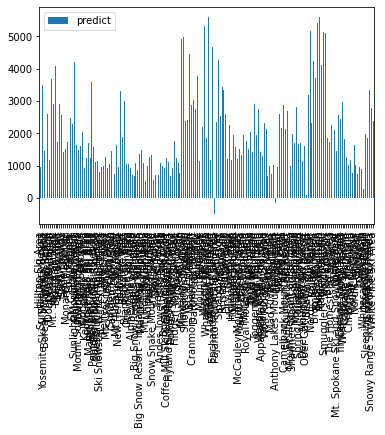

In [12]:
print(list(X.index))
# y_pred = model.predict(X)

df_y_pred = pd.DataFrame(index=list(X.index), columns=["predict"], data=y_pred)
df_y_pred.plot(kind='bar')
plt.plot()
plt.savefig(folder_location + '/figures/fig2.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [13]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, folder_location+'/models/regression_model_adultweekend.joblib') 

['/content/drive/My Drive/Springboard - Data Science Career Track/Guided Capstone - Step Six/models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [14]:

data_list = [[model.coef_], evaluation_var_score, evaluation_absoluate_error]
# print(data_list)
parameters = pd.DataFrame(index=['model 1'], columns=['coefficient', 'explained_variance_score', 'mean_absolute_error'], data=[])
parameters['coefficient'] = [model.coef_]
parameters['explained_variance_score'] = evaluation_var_score
parameters['mean_absolute_error'] = evaluation_absoluate_error

print(parameters)

parameters.to_csv(folder_location + '/data/model_parameters.csv')

                                               coefficient  \
model 1  [2.6754787714683435, 0.0, 0.0, 8.8817841970012...   

         explained_variance_score  mean_absolute_error  
model 1                  0.644727             6.837627  
